In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy.stats import entropy, norm, gamma, binom, uniform
from scipy.special import rel_entr ## relative entropy aka Kullback-Leibler Divergence

## Kullback-Leibler Divergence

**What it is?**: A way to measure the dissimilarity of two probability distributions $p$ and $q$
 - The average number of _extra_ bits needed to encode the data, due to the fact that we used distribution $q$ to encode the data instead of the true distribution $p$
 - The "extra number of bits" interpretation should make it clear that $KL(p||q) \ge 0$ and that the $KL = 0$ only if $q = p$

$KL(p||q) = \sum_{k=1}^Kp_k log \frac{p_k}{q_k}$
 - _Note_: Summation is used for discrete variables. For continuous variables, replace this with the integral

A quantity that is closely related to the KL divergence is the **cross-entropy**:

$H(p, q) = -\sum_kp_k log q_k$
 - Where cross entropy is the average number of bits needed to encode data coming from a source with distribution $p$ when we **used** model $q$ to define our codebook
 - $H(p)$ is the expected number of bits if we use the true model

Typically, we want to **minimize entropy** for a probability distribution:

$H = -\sum_{i=1}^Np(x_i)*logp(x_i)$

Using $log_2$ we can interpret entropy as the "minimum number of bits it would take us to encode our information"

### Continuous Variable

_Note_: Not normalized 

In [3]:
x = np.arange(0, 10, 0.01)
# True distribution
p = gamma.pdf(x, 2, 0)
# Assumed distribution
q = norm.pdf(x, 0, 2)

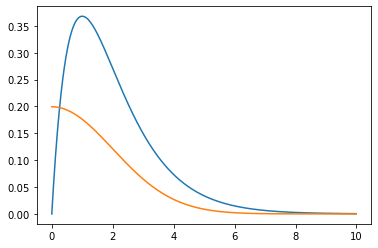

In [4]:
sns.lineplot(x=x, y=p)
sns.lineplot(x=x, y=q)
plt.show()

### Discrete Variable

<AxesSubplot:ylabel='Probability'>

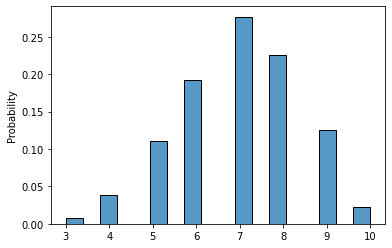

In [5]:
random.seed(42)
disc_p = np.random.binomial(n=10, p=0.70, size=1000)
sns.histplot(disc_p, stat='probability')

<AxesSubplot:ylabel='Probability'>

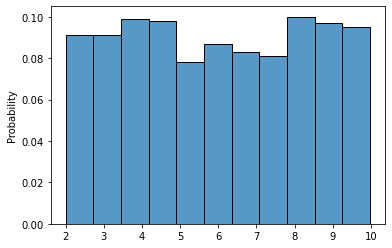

In [6]:
random.seed(42)
disc_q = np.random.uniform(2, 10, 1000)
sns.histplot(disc_q, stat='probability')

### Entropy of a Random Variable

$H = -\sum_{i=1}^Np(x_i)*log(p(x_1))$

In [7]:
# The entropy of our distribution
print('The minimum number of bits it would take us to encode our information is: ', round(entropy(p, base=2), 2))

The minimum number of bits it would take us to encode our information is:  8.91


### Measuring Information Lost using KL Divergence

With KL divergence, we can calculate exactly how much information is lost when we approximate one distribution with another. 

$D_{KL}(p||q) = \sum_{i=1}^Np(x_i)*(logp(x_i) - logq(x_i))$ or, more commonly seen as, $D_{KL}(p||q) = \sum_{i=1}^Np(x_i)*log\frac{p(x_i)}{p(q_i)}$
 - Which is saying, multiply the true distribution of $X$ by the log difference of true distribution $p(x_i)$ and the assumed distribution $q(x_i)$

KL-Divergence is a slight modification of entropy. Rather than just having our probability distribution $p$, we add in our approximating distribution $q$.

_Results_: Small values of KL indicate the two distributions are similar, and larger values indicate greater difference.

In [8]:
def kl_divergence(p, q, x=None, cont=bool):
    # Where p != 0, compute the KL value, else leave value 0
    kl = np.sum(np.where(p != 0, p * (np.log(p) - np.log(q)), 0))
    
    if cont is True:
        sns.lineplot(x=x, y=p)
        sns.lineplot(x=x, y=q)
        plt.title('KL(P||Q) = {}'.format(round(kl, 2)))
    elif cont is False:
        sns.histplot(x=p)
        sns.histplot(x=q, color='orange')
        plt.title('KL(P||Q) = {}'.format(round(kl, 2)))
    else:
        raise ValueError('Enter if continous or discrete boolean value')
    
    return kl

In [13]:
np.sum(rel_entr(p, q))

78.06791387221014

/var/folders/5n/lzw120x534d6n5nbhk8qwzjr0000gs/T/ipykernel_75575/218208573.py:3: RuntimeWarning: divide by zero encountered in log
  kl = np.sum(np.where(p != 0, p * (np.log(p) - np.log(q)), 0))
/var/folders/5n/lzw120x534d6n5nbhk8qwzjr0000gs/T/ipykernel_75575/218208573.py:3: RuntimeWarning: invalid value encountered in multiply
  kl = np.sum(np.where(p != 0, p * (np.log(p) - np.log(q)), 0))


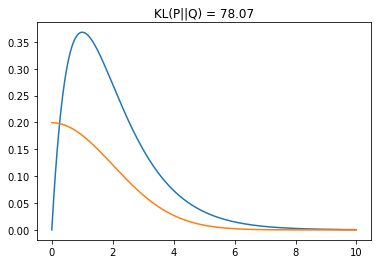

In [9]:
cont_kl_div = kl_divergence(p=p, q=q, x=x, cont=True)

In [14]:
np.sum(rel_entr(disc_p, disc_q))

1852.2659917150004

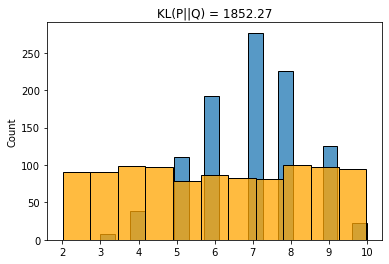

In [10]:
disc_kl_div = kl_divergence(p=disc_p, q=disc_q, cont=False)

### Why is this important?

- We can determine which distribution is better at approximating our data. Especially with some algorithms having assumptions on the underlying distribution of the data, if we approximate with the wrong distribution, then our results will not be __accurate__

- One common scenario where this is useful is when we are working with a complex distribution. Rather than working with the distribution directly, we can make our life easier by using another distribution with well known properties (i.e. normal distribution) that does a decent job of describing the data. In other words, we can use the KL divergence to tell whether a poisson distribution or a normal distribution is a better at approximating the data
